In [1]:
import pandas as pd

PREPROCESSING

In [3]:
df=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\dataset\gender prediction by voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

FEATURE ENGINEERING

In [5]:
df=df.rename(columns={'label':'gender'})

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df['gender'].value_counts()

gender
male      1584
female    1584
Name: count, dtype: int64

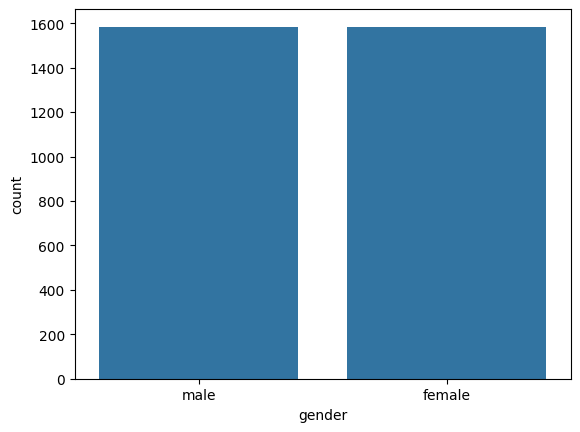

In [8]:
sns.countplot(x=df['gender'])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

Choosing X and Y

In [12]:
x=df.drop('gender',axis=1)
y=df['gender']

Standard Scaler for Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

MODELS WITHOUT PARAMETERS

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9239876509906183


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_test,y_test)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9176532885731699


In [17]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9303220134080669


In [18]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_test,y_test)
y_pred=sv.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9366563758255153


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8733127516510306


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_test,y_test)
y_pred=dt.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

1.0


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9303220134080669


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_test,y_test)
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

1.0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9239876509906183


In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_test,y_test)
y_pred=kn.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.892315838903376


XGBOOST also for Overfit

In [25]:
from xgboost import XGBClassifier
xg=XGBClassifier(n_estimators=100,learning_rate=0.1)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.904984563738273


In [26]:
from xgboost import XGBClassifier
xg=XGBClassifier(n_estimators=100,learning_rate=0.1)
xg.fit(x_test,y_test)
y_pred=xg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

1.0


In [ ]:
#chose knn among all models and performed kfold to find n_neighbors

In [28]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=6,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    print(r2_score(y_pred,y_test))

0.9089328063241107
0.9239269814283861
0.9090073529411765
0.893925696327866
0.8712047293807037
0.9015137384317383


In [29]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=6,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    kn.fit(x_test,y_test)
    y_pred=kn.predict(x_test)
    print(r2_score(y_pred,y_test))

0.8555299539170507
0.8621949628082997
0.8938419117647058
0.886337543053961
0.886337543053961
0.8484500574052813


Model with parameter

In [31]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9393626184323859


In [30]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(x_test,y_test)
y_pred=kn.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9393626184323859
